# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

proc_cities = []
skip_cities = []
city_data = []
City_Name=[]
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lat=[]
Lng=[]
Max_temp=[]
Wind_speed=[]

for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city + '&units=imperial'
    try: 
        response = requests.get(query_url).json()
        City_Name.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_temp.append(response['main']['temp_max'])
        Wind_speed.append(response['wind']['speed'])
        proc_cities.append(city)
        print(f'Processing city {len(proc_cities)} of {len(cities)}: {city}')
    except:
        skip_cities.append(city)
        print(f'Skipping {city}')

Processing city 1 of 618: verkhoyansk
Processing city 2 of 618: acari
Processing city 3 of 618: taree
Processing city 4 of 618: sabang
Processing city 5 of 618: burgeo
Processing city 6 of 618: acapulco
Processing city 7 of 618: atuona
Processing city 8 of 618: rikitea
Processing city 9 of 618: arraial do cabo
Processing city 10 of 618: marrakesh
Processing city 11 of 618: gunnedah
Processing city 12 of 618: punta arenas
Skipping barentsburg
Processing city 13 of 618: hermanus
Processing city 14 of 618: bluff
Processing city 15 of 618: albany
Processing city 16 of 618: sedalia
Processing city 17 of 618: zlobin
Processing city 18 of 618: san patricio
Processing city 19 of 618: lixourion
Skipping ust-kamchatsk
Processing city 20 of 618: trairi
Processing city 21 of 618: hualmay
Processing city 22 of 618: kaeo
Processing city 23 of 618: seoul
Processing city 24 of 618: tasiilaq
Processing city 25 of 618: busselton
Processing city 26 of 618: ushuaia
Processing city 27 of 618: hithadhoo
Pro

Processing city 209 of 618: huai thalaeng
Processing city 210 of 618: necochea
Processing city 211 of 618: campina verde
Processing city 212 of 618: north bend
Processing city 213 of 618: bandarbeyla
Skipping bokspits
Processing city 214 of 618: yarmouth
Processing city 215 of 618: tiksi
Processing city 216 of 618: vardo
Processing city 217 of 618: vila velha
Processing city 218 of 618: upernavik
Processing city 219 of 618: fortuna
Processing city 220 of 618: sumbe
Processing city 221 of 618: san cristobal
Skipping bolungarvik
Processing city 222 of 618: vaitape
Processing city 223 of 618: carnarvon
Processing city 224 of 618: bukama
Processing city 225 of 618: pisco
Processing city 226 of 618: biak
Processing city 227 of 618: tautira
Processing city 228 of 618: porto novo
Processing city 229 of 618: nemuro
Processing city 230 of 618: la malbaie
Processing city 231 of 618: kargasok
Processing city 232 of 618: smithers
Skipping chengmai
Processing city 233 of 618: los llanos de aridane


Processing city 420 of 618: chambas
Processing city 421 of 618: muskegon
Processing city 422 of 618: rumonge
Processing city 423 of 618: shenjiamen
Processing city 424 of 618: piney green
Processing city 425 of 618: ewa beach
Processing city 426 of 618: winnemucca
Processing city 427 of 618: mataram
Processing city 428 of 618: bilma
Processing city 429 of 618: clyde river
Processing city 430 of 618: coxim
Processing city 431 of 618: nouna
Processing city 432 of 618: samarinda
Skipping sakakah
Processing city 433 of 618: quatre cocos
Processing city 434 of 618: vestmannaeyjar
Processing city 435 of 618: elizabeth city
Processing city 436 of 618: kayes
Processing city 437 of 618: burns lake
Processing city 438 of 618: jurm
Processing city 439 of 618: sayyan
Processing city 440 of 618: quata
Processing city 441 of 618: san policarpo
Processing city 442 of 618: xining
Processing city 443 of 618: kimparana
Processing city 444 of 618: uchiza
Processing city 445 of 618: kasongo-lunda
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [67]:
city_df = pd.DataFrame(data={'City Name':City_Name,
'Cloudiness': Cloudiness,
'Country': Country,
'Date': Date,
'Humidity %': Humidity,
 'Latitude': Lat,
'Longitude': Lng,
'Max Temp': Max_temp,
'Wind Speed': Wind_speed})

city_df.to_csv()
city_df.tail()

,City Name,Cloudiness,Country,Date,Humidity %,Latitude,Longitude,Max Temp,Wind Speed
551,Karonga,80,MW,1554606130,100,-9.94,33.93,75.45,6.73
552,Pailon,0,BO,1554602400,82,-17.66,-62.72,60.80,5.82
553,Meleuz,8,RU,1554606130,87,52.96,55.93,34.05,8.08
554,San Vicente,20,SV,1554606027,78,13.64,-88.78,80.60,3.36
555,Kamaishi,75,JP,1554602400,43,39.28,141.86,50.00,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

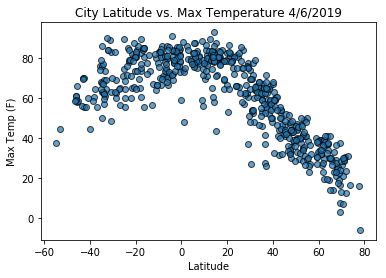

In [59]:
plt.scatter(city_df['Latitude'],city_df['Max Temp'], alpha=.7, edgecolors='black')
plt.title('City Latitude vs. Max Temperature 4/6/2019')
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.show()

#### Latitude vs. Humidity Plot

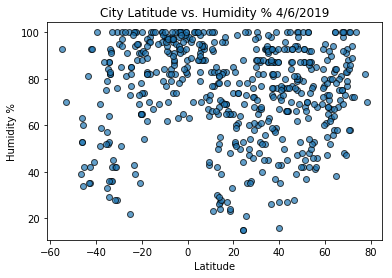

In [21]:
plt.scatter(city_df['Latitude'],city_df['Humidity %'], alpha=.7, edgecolors='black')
plt.title('City Latitude vs. Humidity % 4/6/2019')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.show()

#### Latitude vs. Cloudiness Plot

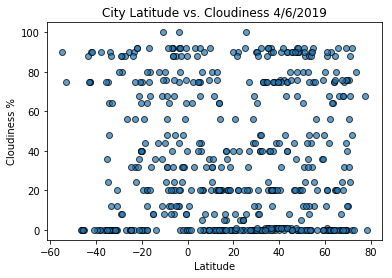

In [22]:
plt.scatter(city_df['Latitude'],city_df['Cloudiness'], alpha=.7, edgecolors='black')
plt.title('City Latitude vs. Cloudiness 4/6/2019')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.show()

#### Latitude vs. Wind Speed Plot

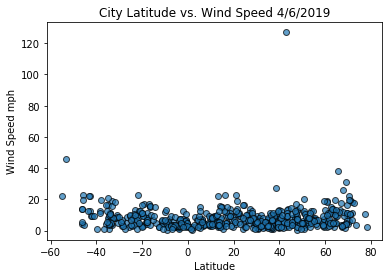

In [60]:
# city_df = city_df.drop(city_df[)
plt.scatter(city_df['Latitude'],city_df['Wind Speed'], alpha=.7, edgecolors='black')
plt.title('City Latitude vs. Wind Speed 4/6/2019')
plt.ylabel('Wind Speed mph')
plt.xlabel('Latitude')
plt.show()